Model: Logistic Regression
Accuracy: 0.9150
              precision    recall  f1-score   support

           0       0.73      0.53      0.61        76
           1       0.93      0.97      0.95       524

    accuracy                           0.92       600
   macro avg       0.83      0.75      0.78       600
weighted avg       0.91      0.92      0.91       600

--------------------------------------------------


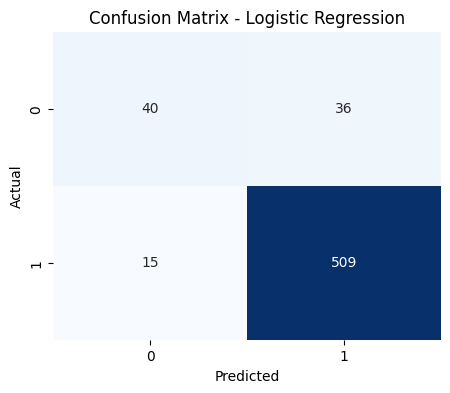

Model: Decision Tree
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       524

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

--------------------------------------------------


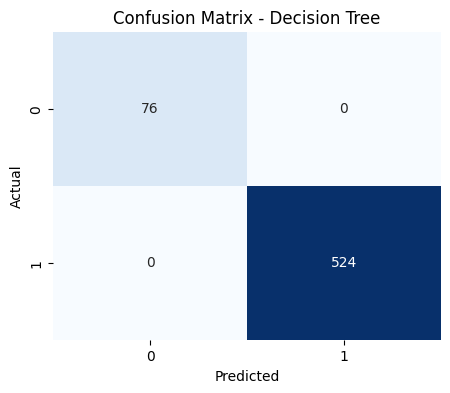

Model: Random Forest
Accuracy: 0.9967
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       1.00      1.00      1.00       524

    accuracy                           1.00       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      1.00      1.00       600

--------------------------------------------------


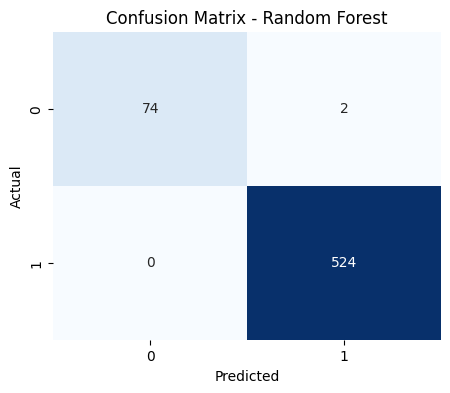

Model: Support Vector Machine
Accuracy: 0.9483
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        76
           1       0.95      0.99      0.97       524

    accuracy                           0.95       600
   macro avg       0.93      0.82      0.87       600
weighted avg       0.95      0.95      0.94       600

--------------------------------------------------


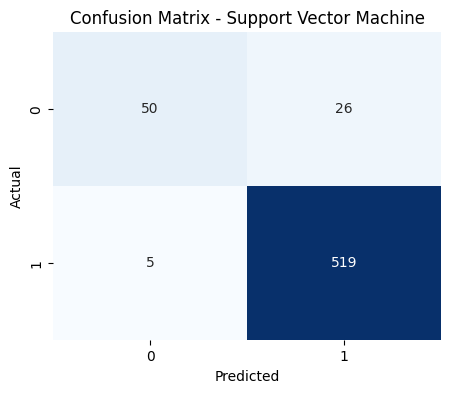

Model: k-Nearest Neighbors
Accuracy: 0.9233
              precision    recall  f1-score   support

           0       0.84      0.49      0.62        76
           1       0.93      0.99      0.96       524

    accuracy                           0.92       600
   macro avg       0.89      0.74      0.79       600
weighted avg       0.92      0.92      0.91       600

--------------------------------------------------


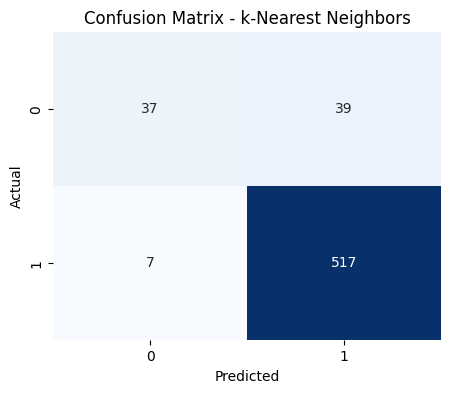

Model: Naive Bayes
Accuracy: 0.8917
              precision    recall  f1-score   support

           0       0.56      0.71      0.62        76
           1       0.96      0.92      0.94       524

    accuracy                           0.89       600
   macro avg       0.76      0.81      0.78       600
weighted avg       0.91      0.89      0.90       600

--------------------------------------------------


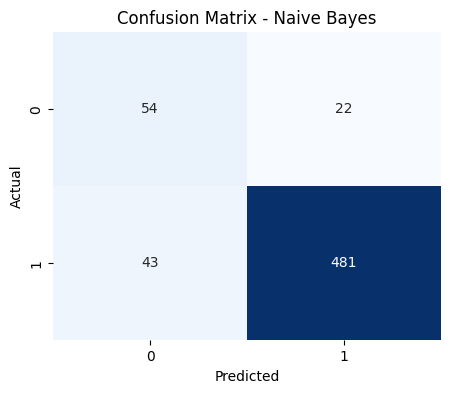

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/sample_data/newborn_health_monitoring_with_risk.csv')

# Drop irrelevant columns
cols_to_drop = ['baby_id', 'name', 'date']
for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(columns=col)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
y_col = 'risk_level'
if y_col in cat_cols:
    cat_cols.remove(y_col)
le_dict = {col: LabelEncoder() for col in cat_cols}
for col in cat_cols:
    df[col] = le_dict[col].fit_transform(df[col].astype(str))

# Encode target
y_le = LabelEncoder()
df[y_col] = y_le.fit_transform(df[y_col].astype(str))

# Separate features and target
X = df.drop(columns=[y_col])
y = df[y_col]

# Fill missing numeric values
X = X.fillna(X.median(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(probability=True),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model with visualization
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)

print("Tuned RF Test Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.99875
Tuned RF Test Accuracy: 0.9966666666666667
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       1.00      1.00      1.00       524

    accuracy                           1.00       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      1.00      1.00       600



**Neural Network Section**

Before SMOTE: [ 322 2078]
After SMOTE:  [2078 2078]
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6819 - loss: 0.5940 - val_accuracy: 0.9014 - val_loss: 0.2905
Epoch 2/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8822 - loss: 0.2874 - val_accuracy: 0.9062 - val_loss: 0.2206
Epoch 3/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9109 - loss: 0.2311 - val_accuracy: 0.9627 - val_loss: 0.1319
Epoch 4/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9047 - loss: 0.2221 - val_accuracy: 0.9820 - val_loss: 0.0950
Epoch 5/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9365 - loss: 0.1687 - val_accuracy: 0.9904 - val_loss: 0.0647
Epoch 6/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9365 - loss: 0.1619 - val_accuracy: 0.9952 - val_loss: 0.0496
Epoch 7/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9272 - loss: 0.1664 - val_accuracy: 0.9940 - val_loss: 0.0489
Epoch 8/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1264 - val_accuracy: 0.9880 - val_

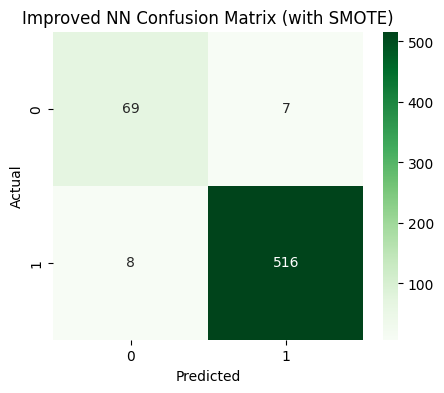

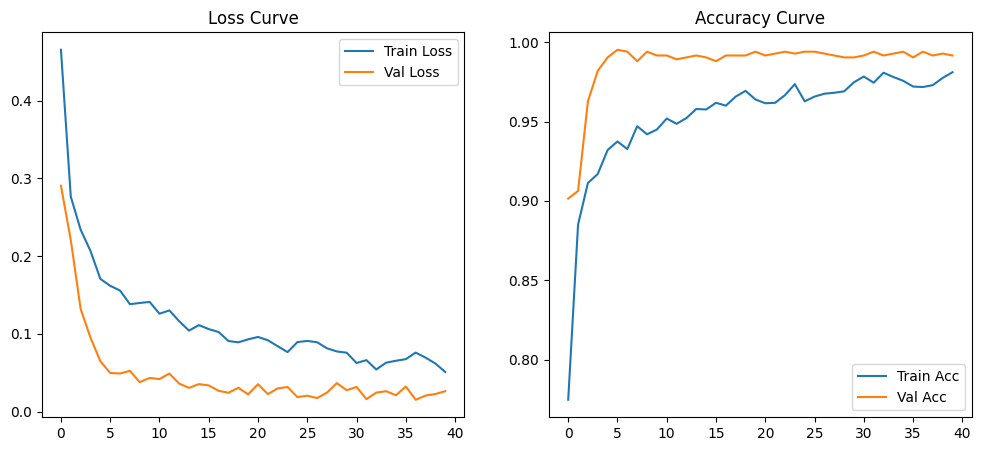

In [7]:
# ---------------- IMPORTS ----------------
!pip install imbalanced-learn --quiet

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# ---------------- LOAD DATA ----------------
df = pd.read_csv('/content/sample_data/newborn_health_monitoring_with_risk.csv')

# Drop unnecessary columns
for col in ['baby_id','name','date']:
    if col in df.columns:
        df = df.drop(columns=col)

# Label encoding for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
y_col = 'risk_level'
if y_col in cat_cols: cat_cols.remove(y_col)

label_encoders = {col: LabelEncoder() for col in cat_cols}
for col in cat_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

# Encode target
y_le = LabelEncoder()
df[y_col] = y_le.fit_transform(df[y_col])

# ---------------- SPLIT X & Y ----------------
X = df.drop(columns=[y_col])
y = df[y_col]

# Fill missing numeric values
X = X.fillna(X.median(numeric_only=True))

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------------- APPLY SMOTE ----------------
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE: ", np.bincount(y_resampled))

# ---------------- BUILD NN MODEL ----------------
model = Sequential([
    Dense(128, activation='relu', input_dim=X_resampled.shape[1]),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------------- TRAIN MODEL ----------------
history = model.fit(
    X_resampled, y_resampled,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ---------------- EVALUATE ----------------
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\n✅ Improved Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------------- CONFUSION MATRIX ----------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Improved NN Confusion Matrix (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------- ACC & LOSS PLOT ----------------
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


**Visulaztion Section**

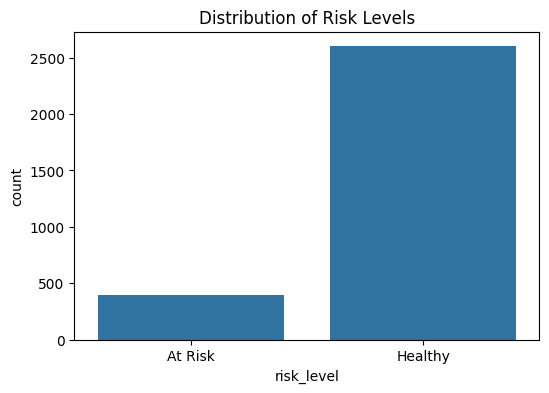

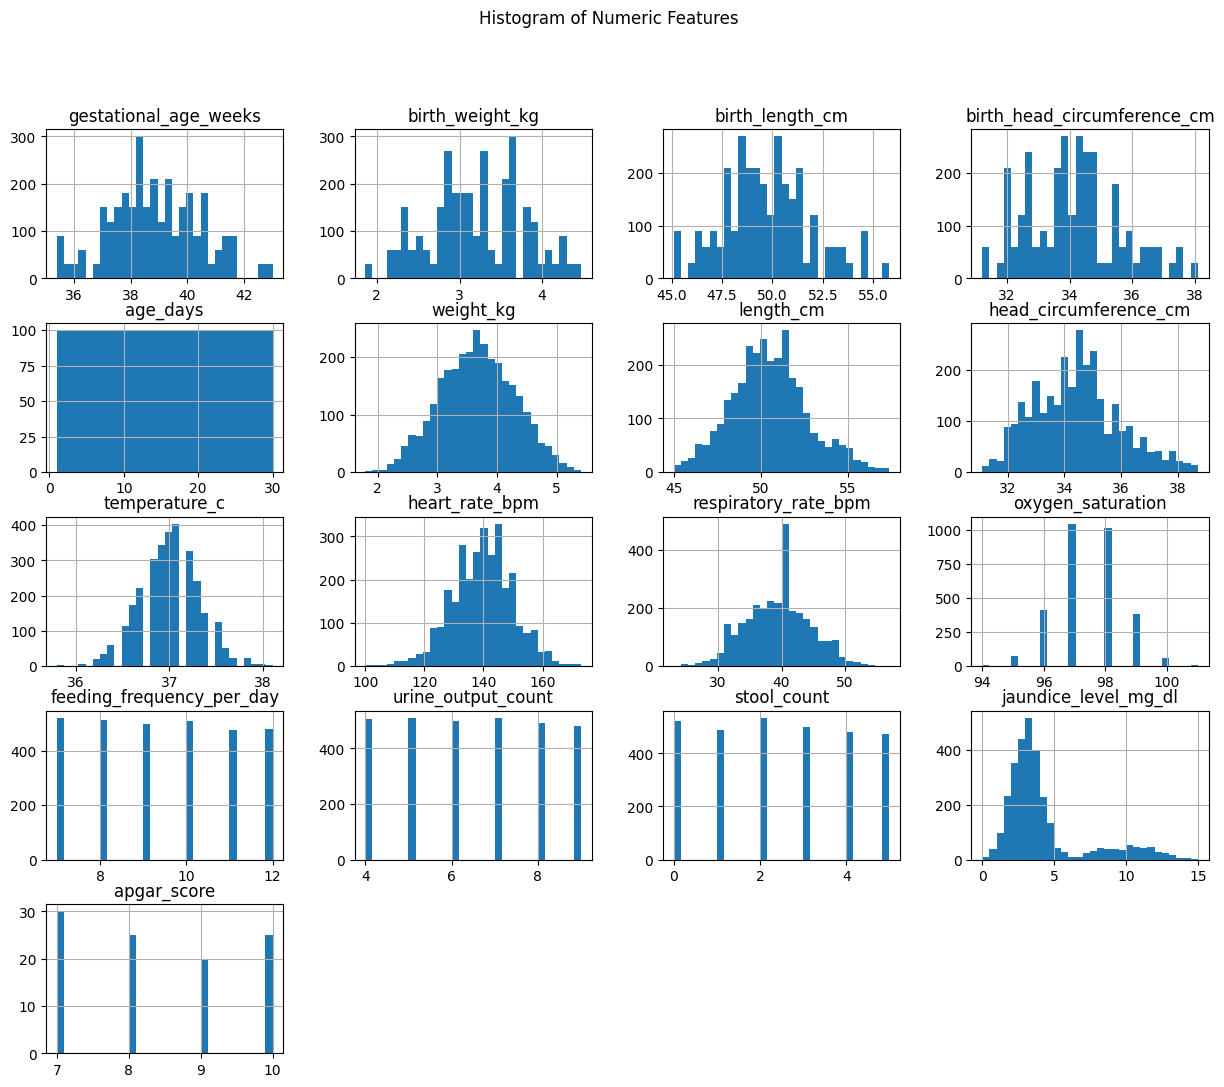

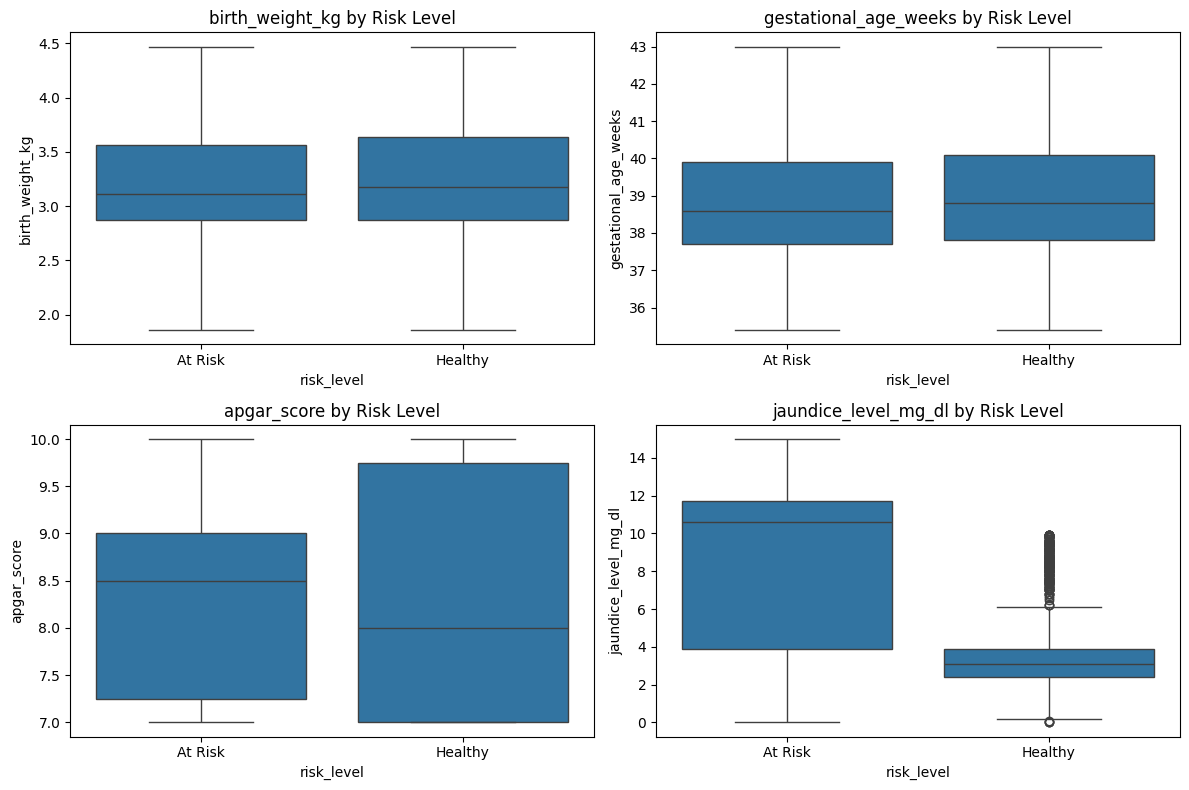

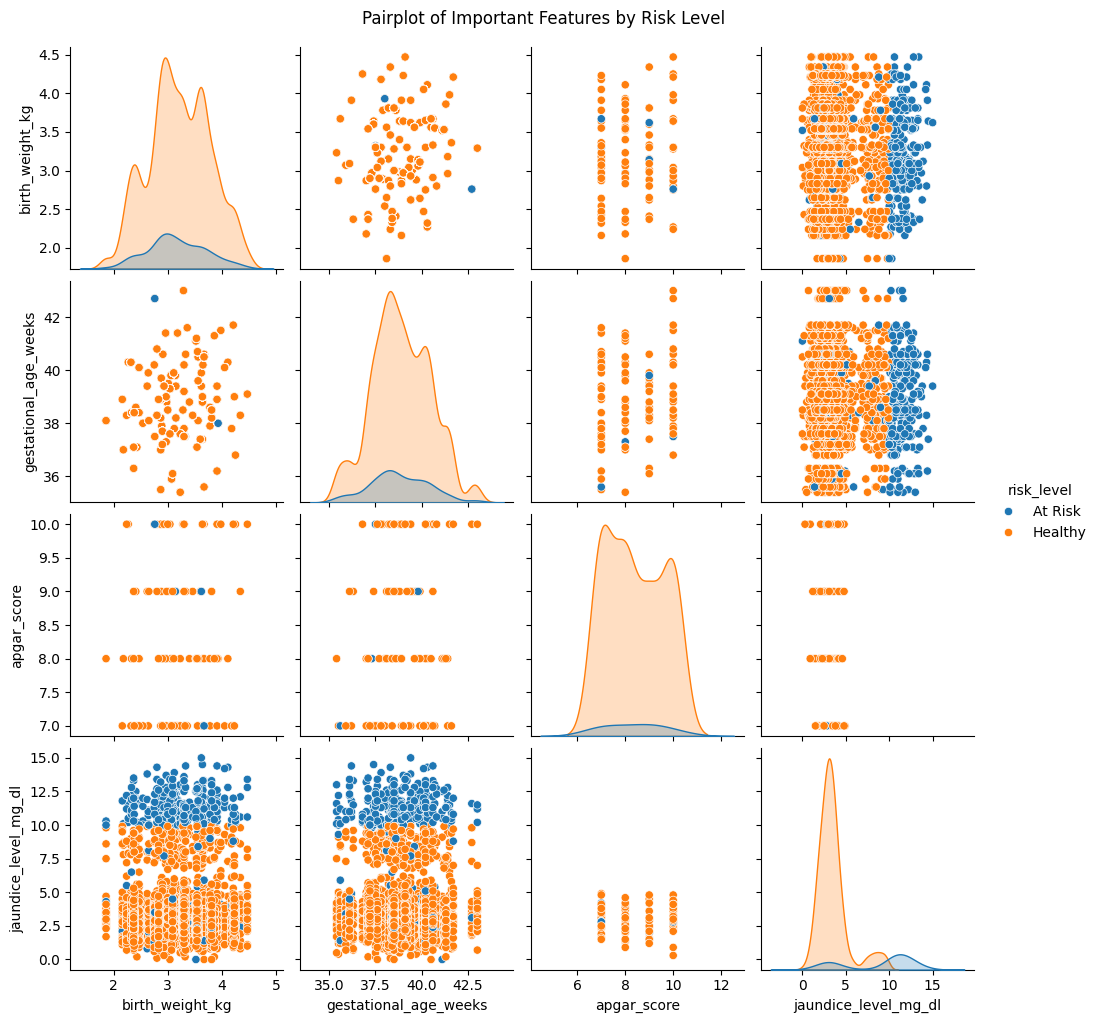

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/sample_data/newborn_health_monitoring_with_risk.csv')

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title('Distribution of Risk Levels')
plt.show()

# Numeric features distribution with histograms
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df[numeric_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle('Histogram of Numeric Features')
plt.show()

# Boxplot of selected important numeric features by risk_level
features = ['birth_weight_kg', 'gestational_age_weeks', 'apgar_score', 'jaundice_level_mg_dl']
plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='risk_level', y=col, data=df)
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()

# Pairplot of select features colored by risk_level
sns.pairplot(df, vars=features, hue='risk_level', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Important Features by Risk Level', y=1.02)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      3000 non-null   object 
 1   name                         3000 non-null   object 
 2   gender                       3000 non-null   object 
 3   gestational_age_weeks        3000 non-null   float64
 4   birth_weight_kg              3000 non-null   float64
 5   birth_length_cm              3000 non-null   float64
 6   birth_head_circumference_cm  3000 non-null   float64
 7   date                         3000 non-null   object 
 8   age_days                     3000 non-null   int64  
 9   weight_kg                    3000 non-null   float64
 10  length_cm                    3000 non-null   float64
 11  head_circumference_cm        3000 non-null   float64
 12  temperature_c                3000 non-null   float64
 13  heart_rate_bpm    

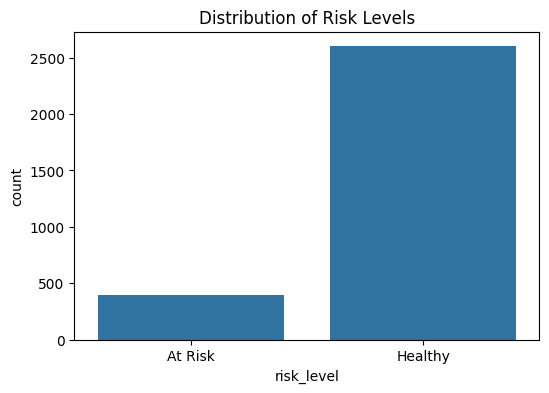

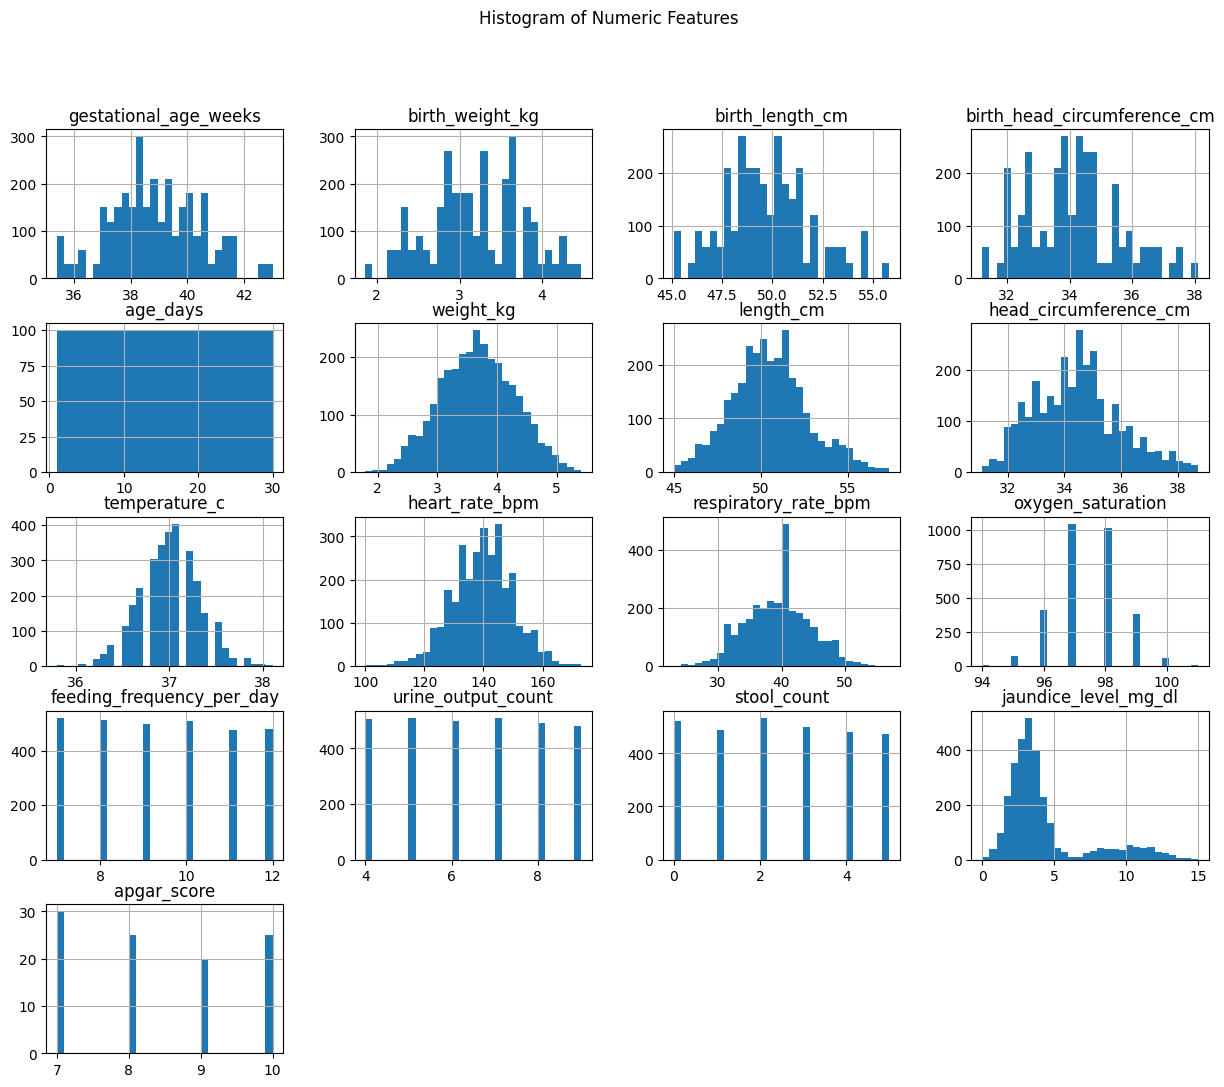

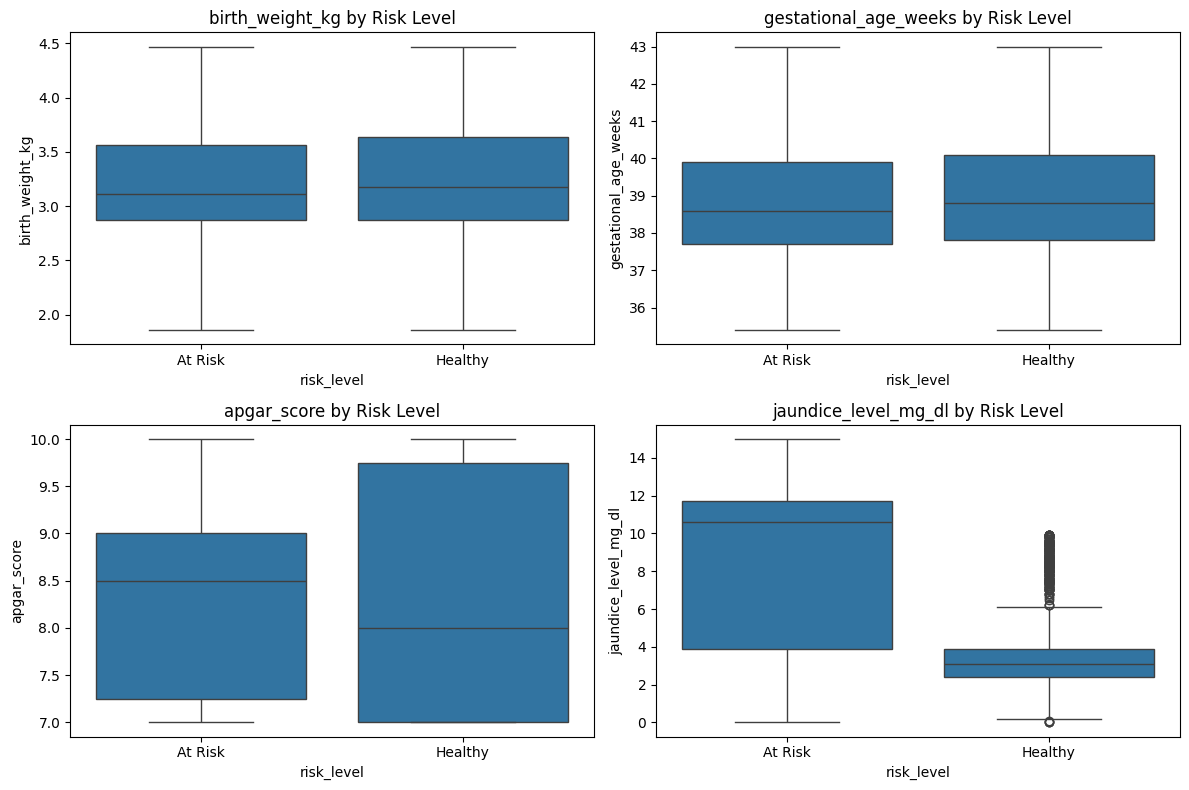

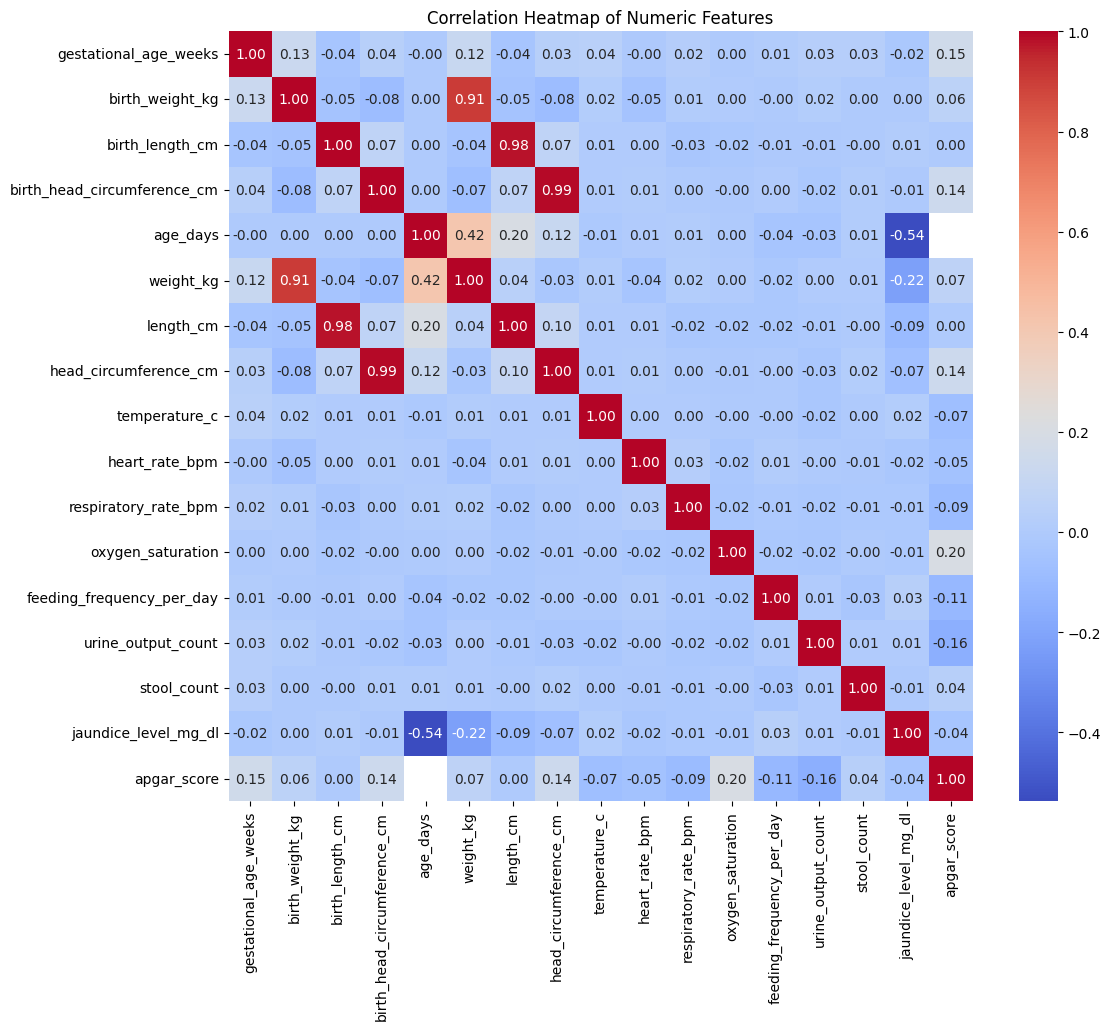

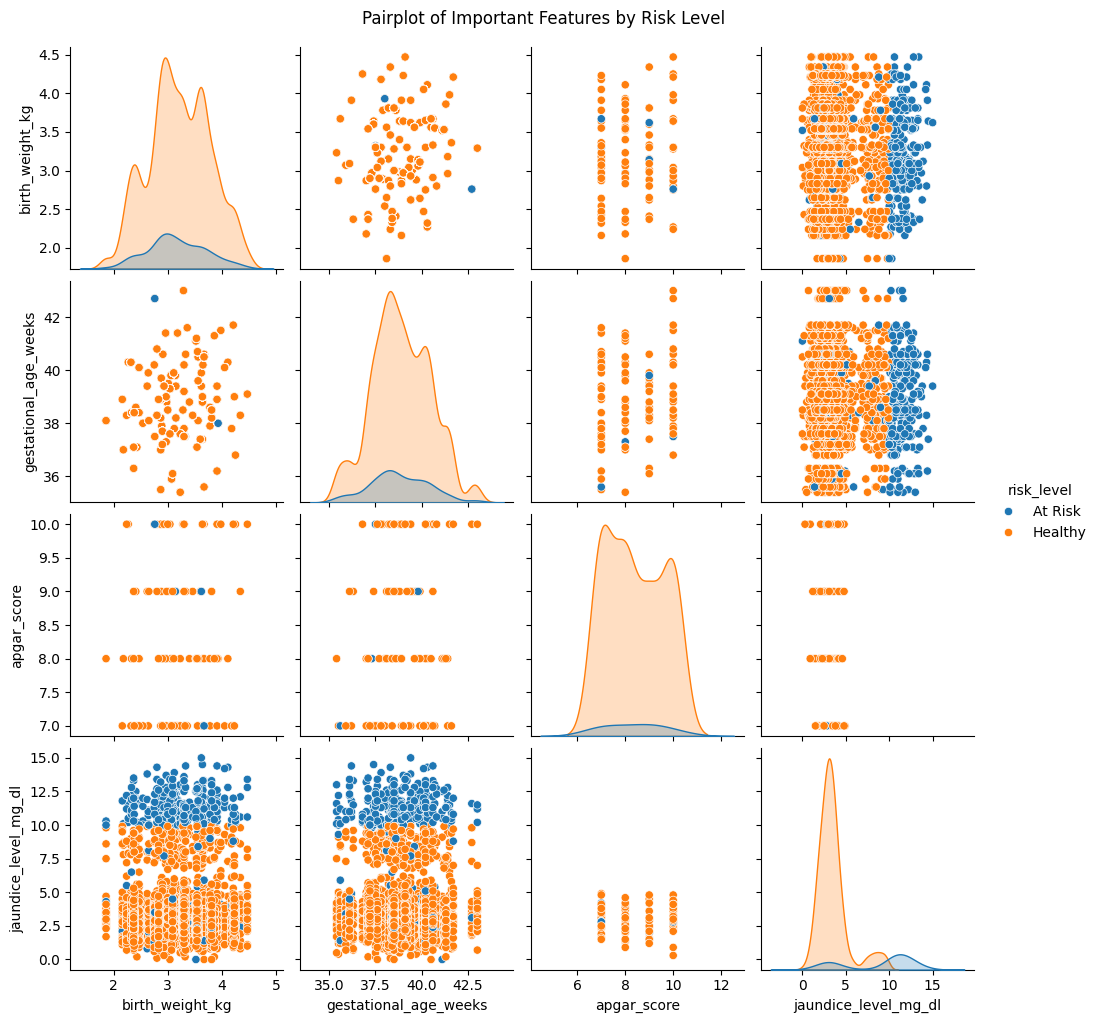

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/sample_data/newborn_health_monitoring_with_risk.csv')

# Overview of dataset
print(df.info())
print(df.describe())
print(df['risk_level'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title('Distribution of Risk Levels')
plt.show()

# Numeric features distribution with histograms
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df[numeric_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle('Histogram of Numeric Features')
plt.show()

# Boxplot of selected important numeric features by risk_level
features = ['birth_weight_kg', 'gestational_age_weeks', 'apgar_score', 'jaundice_level_mg_dl']
plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='risk_level', y=col, data=df)
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()

# Correlation heatmap of numeric features
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Pairplot of select features colored by risk_level
sns.pairplot(df, vars=features, hue='risk_level', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Important Features by Risk Level', y=1.02)
plt.show()
